In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from pathlib import Path
nltk.download('stopwords')
nltk.download('punkt')

df_mturk_500 = pd.read_csv("500_batch_results.csv", error_bad_lines=False)
df_mturk_500.shape[0]

[nltk_data] Downloading package stopwords to C:\Users\USER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\USER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2500

In [2]:
df_mturk_8468 = pd.read_csv("8468_batch_results.csv", error_bad_lines=False)
df_mturk_8468.shape[0]

42340

In [3]:
df_mturk_1138 = pd.read_csv("mturk_5_data.csv", error_bad_lines=False)
df_mturk_1138.shape[0]

5690

In [4]:
df_mturk_500_t = df_mturk_500[['WorkerId', 'WorkTimeInSeconds', 'Input.Original', 'Answer.privacy.label']]
df_mturk_1138_t = df_mturk_1138[['WorkerId', 'WorkTimeInSeconds', 'Input.Original', 'Answer.privacy.label']]
df_mturk_8468_t = df_mturk_8468[['WorkerId', 'WorkTimeInSeconds', 'Input.Original', 'Answer.privacy.label']]
UNIQUE_WORKERS = 5

In [5]:
df_result = pd.concat([df_mturk_500_t, df_mturk_1138_t, df_mturk_8468_t])
HITS = df_result.shape[0]
df_result = df_result.reset_index(drop=True)
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   WorkerId              50530 non-null  object
 1   WorkTimeInSeconds     50530 non-null  int64 
 2   Input.Original        50530 non-null  object
 3   Answer.privacy.label  50530 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


<AxesSubplot:xlabel='Answer.privacy.label', ylabel='WorkTimeInSeconds'>

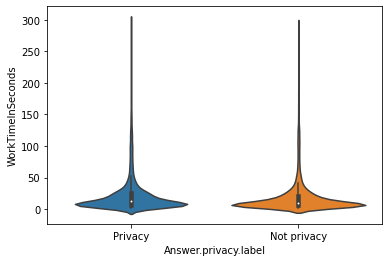

In [6]:
sns.violinplot(x=df_result['Answer.privacy.label'], y=df_result['WorkTimeInSeconds'])

In [7]:
from collections import Counter

df_result['Ratio'] = 0
for i in range(HITS):
    if i % UNIQUE_WORKERS == 0:
        counter = Counter(df_result.iloc[i:i+5]['Answer.privacy.label'])
        for j in range(UNIQUE_WORKERS):
            df_result['Ratio'][i+j] = counter['Privacy']
df_result


<ipython-input-7-75506a6fa05b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result['Ratio'][i+j] = counter['Privacy']


,WorkerId,WorkTimeInSeconds,Input.Original,Answer.privacy.label,Ratio
0,AOTNZ2CR4S0SL,14,"patents, designs, algorithms, utility models, ...",Privacy,4
1,A2WMX6GLWV0KC,251,"patents, designs, algorithms, utility models, ...",Privacy,4
2,A2G44A4ZPWRPXU,13,"patents, designs, algorithms, utility models, ...",Privacy,4
3,A1453O2WV1825Y,45,"patents, designs, algorithms, utility models, ...",Not privacy,4
4,A2UUQUAO917V8X,17,"patents, designs, algorithms, utility models, ...",Privacy,4
...,...,...,...,...,...
50525,A26T17CDTYJI1W,14,"below, the Privacy Policy for Nest Web Sites a...",Privacy,3
50526,A2GQH4SWIOFH2L,4,"below, the Privacy Policy for Nest Web Sites a...",Not privacy,3
50527,A2KKHYQQO6NJB0,23,"below, the Privacy Policy for Nest Web Sites a...",Privacy,3
50528,A32ZRN4S2IMN0O,8,"below, the Privacy Policy for Nest Web Sites a...",Not privacy,3


In [5]:
# stop_words = set(stopwords.words('english'))
# lemma = WordNetLemmatizer()

# def clean_text(s):
#     s = re.sub('[^a-zA-Z]', ' ', s)  # Removing numbers and punctuation
#     s = str(s).lower()  # Convert all characters into lowercase
#     s = word_tokenize(s)  # Tokenization
#     s = [w for w in s if w not in stop_words]  # Removing stop words
#     s = [lemma.lemmatize(word=w, pos='v') for w in s]  # Lemmatization
#     s = [i for i in s if len(i) > 2]  # Remove the words having length <= 2
#     s = ' '.join(s)  # Converting list to string
#     return s

In [8]:
df_privacy_ratio = pd.DataFrame(columns=['Original', 'PrivacyRatio'])

for i, row in df_result.iterrows():
    if i % UNIQUE_WORKERS == 0:
        new_row = {
            'Original': row['Input.Original'],
            'PrivacyRatio': row['Ratio']
        }
        df_privacy_ratio = df_privacy_ratio.append(new_row, ignore_index=True)

df_privacy_ratio

,Original,PrivacyRatio
0,"patents, designs, algorithms, utility models, ...",4
1,Continue shopping Go to cart OK Home > Terms &...,3
2,The following Sections of this PSO Addendum wi...,3
3,Lingo Bingo (“Prize Draw”) is organised by Hut...,0
4,Chronus will consider all the available inform...,5
...,...,...
10101,"for the conduct of third parties, including ot...",4
10102,6.Limited availability – There are a total of ...,2
10103,"You agree not to, and shall not allow anyone e...",2
10104,“Documentation” means the technical user docum...,2


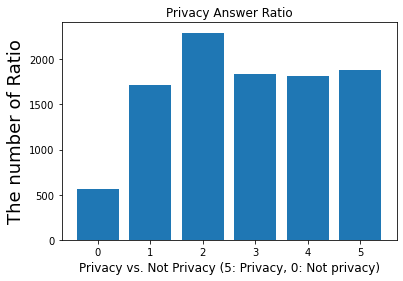

In [9]:
labels, values = zip(*sorted(Counter(df_privacy_ratio['PrivacyRatio']).items()))

indexes = np.arange(len(labels))
plt.bar(indexes, values)
plt.title('Privacy Answer Ratio')
plt.xlabel('Privacy vs. Not Privacy (5: Privacy, 0: Not privacy)', fontsize=12)
plt.ylabel('The number of Ratio', fontsize=18)
plt.show()

In [1]:
# sns.jointplot(x='WorkTimeInSeconds', y='Ratio', data=df_result)

In [11]:
import os
df_privacy_ratio.to_csv(Path(os.getcwd() + "/" + "input_data.csv"), index=False)